## EDA 

Below are the features on which most of the loans are defaulted. Here we would see if that truly is the case and try and gain some insights from the given data.

- High interest rate
- Delinquency
- Debt-to-income ratio
- Home-ownership
- Term
- Purpose


In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/loans.csv')

/homes/nv304/virtpy3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
# df.dtypes

In the below graph we see 4 categories, in which the loan_status are present.

- Charged off, those loans deemed unlikely to be collected by the creditor, thus it is a concerning factor, not to give such loan.
- Default, those loans where there is the failure to repay a debt including interest or principal on a loan or security
- Fully paid,
- Last (>90 days)
- Ongoing

The most important categories are charged off, default and fully paid. And we there are lot of people fitting these three categories.

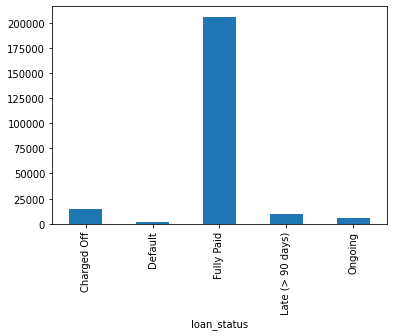

In [26]:
df.groupby(['loan_status']).count()['account_id'].plot(kind='bar')

### Key Factor - 1 - Term

From the below two graphs, it is evident that most Defaulted loans are shorter duration, and the cases of Charged off instances are very high for the 36 month duration.  

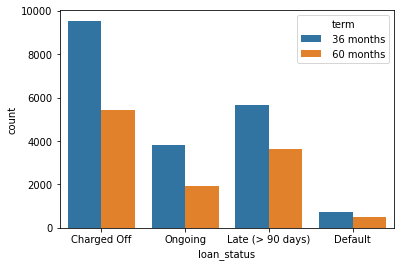

In [27]:
y = sns.countplot(x="loan_status", data=df[df['loan_status']!='Fully Paid'] , hue='term')

### Key Factor - 2 - Interest Rate
Again, it can be seen easily, that bad loans (charged off and default) have much higher interest rate than Fully Paid loans, also, we can infrence that,those loans which are in category 'Late (> 90 days)' could be bad. 

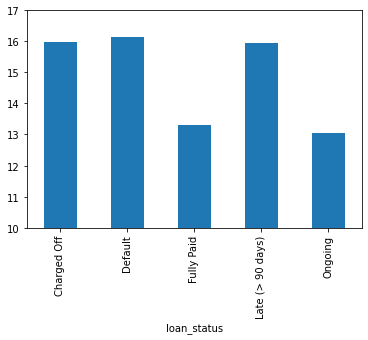

In [53]:
df.groupby(['loan_status'])['interest_rate'].mean().plot(kind='bar',ylim=[10,17])

### Key Factor - 3 - Delinquency
From the graph below, we can say, that most people who are involved in minor/major crimes are the ones who have most default and charged off (bad) loans. 

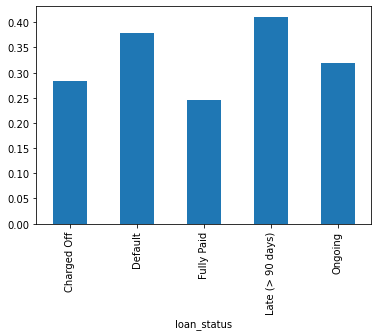

In [61]:
df.groupby(['loan_status'])['delinquency_2y'].mean().plot(kind='bar')

### Key Factor - 4 - Debt to income
Probably this is the most important feature, as seen from the graph, the ratio of people who have fully paid the loans to the bad loans is very high. Thus we can conclusively day, we should be wary of people who have high debt to income.  

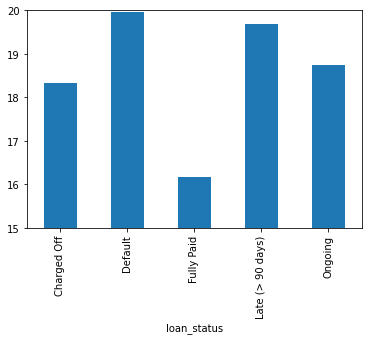

In [63]:
df.groupby(['loan_status'])['debt_to_income'].mean().plot(kind='bar',ylim=[15,20])

### Key Factor - 5 - Purpose
The loans which were defaulted or charged off, were mostly taken for by people who were already in debt (debt_reconsolidation, credit card). Thus it can be safely be said, proper consideration be taken into such accounts.

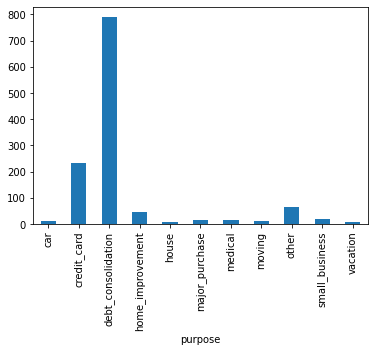

In [67]:
df[df['loan_status']=='Default'].groupby(['purpose']).count()['account_id'].plot(kind='bar')

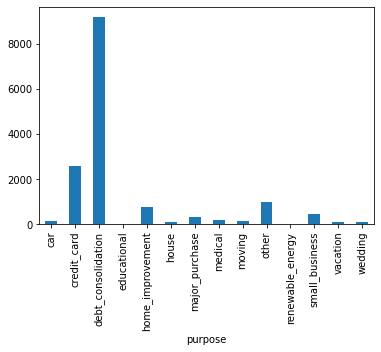

In [68]:
df[df['loan_status']=='Charged Off'].groupby(['purpose']).count()['account_id'].plot(kind='bar')

### Key Factor - 5 - Home Ownership
From the below two graphs we can interpret that, most people who defaulted or were charged off were living on rent or their property was mortgaged.

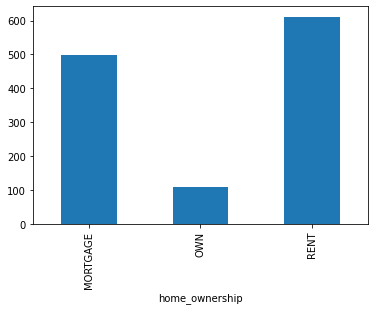

In [71]:
df[df['loan_status']=='Default'].groupby(['home_ownership']).count()['account_id'].plot(kind='bar')

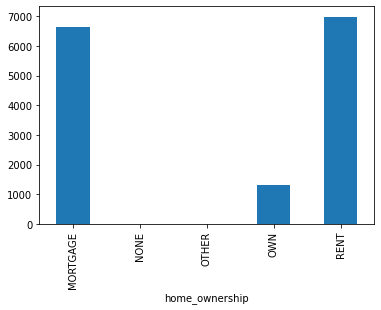

In [72]:
df[df['loan_status']=='Charged Off'].groupby(['home_ownership']).count()['account_id'].plot(kind='bar')

#### Other Question
Other questions such as which distict resulted in most defaulted loans can be seen answered in the below graph

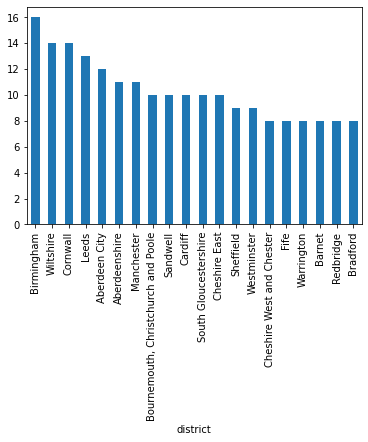

In [23]:
df[df['loan_status']=='Default'].groupby(['district']).count()['account_id'].sort_values(ascending=False).head(20).plot(kind='bar')